In [2]:
import numpy as np
np.random.seed(8889)
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm
from graspy.plot import heatmap, pairplot

%matplotlib inline

In [5]:
#checking python Version
import platform
print(platform.python_version())

3.8.5


After ensuring compliance run through tutorial to check that functionality remains intact

<AxesSubplot:title={'center':'2-block SBM (directed)'}>

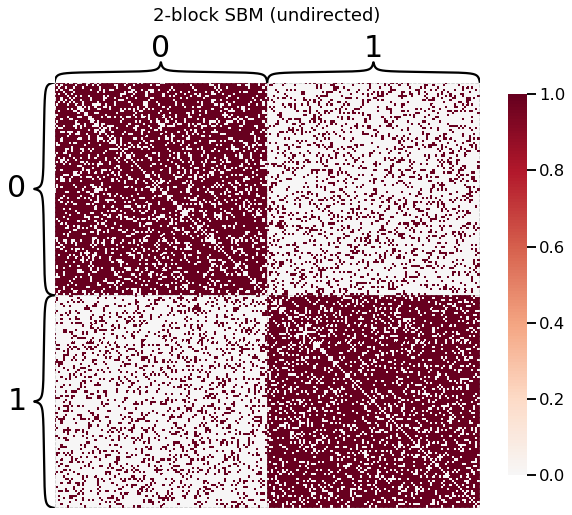

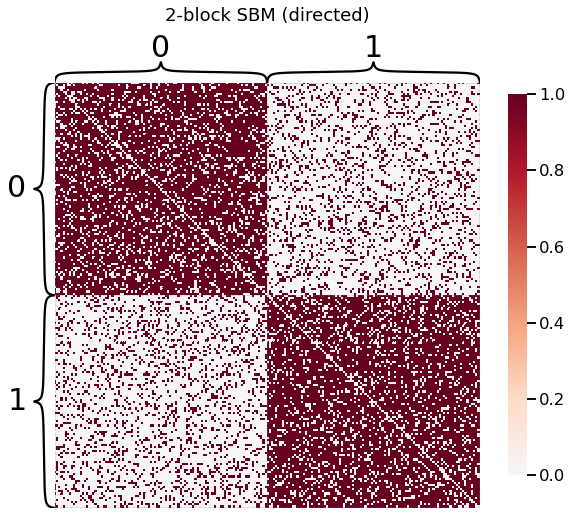

In [4]:
n_verts = 100
labels_sbm = n_verts * [0] + n_verts * [1]
P = np.array([[0.8, 0.2], [0.2, 0.8]])
undirected_sbm = sbm(2 * [n_verts], P)
heatmap(undirected_sbm, title='2-block SBM (undirected)', inner_hier_labels=labels_sbm)
directed_sbm = sbm(2 * [n_verts], P, directed=True)
heatmap(directed_sbm, title='2-block SBM (directed)', inner_hier_labels=labels_sbm)

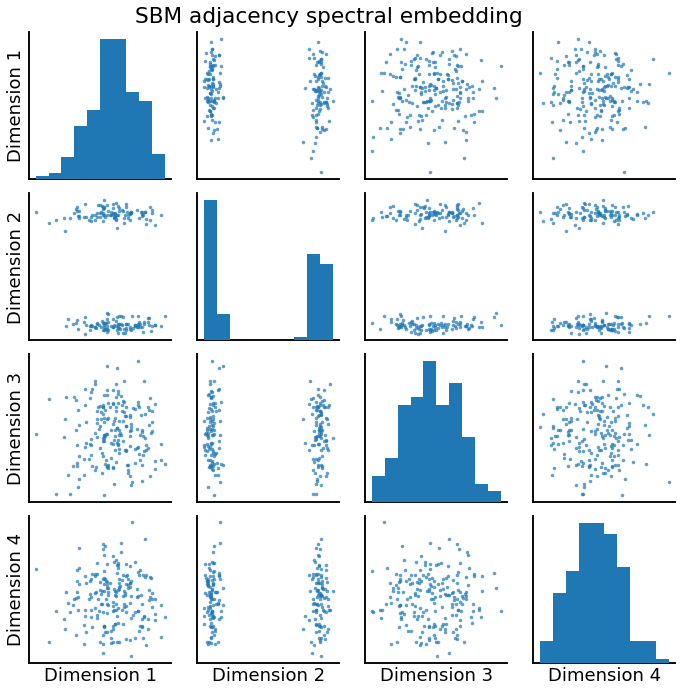

In [3]:
ase = AdjacencySpectralEmbed()
Xhat = ase.fit_transform(undirected_sbm)
pairplot(Xhat, title='SBM adjacency spectral embedding')


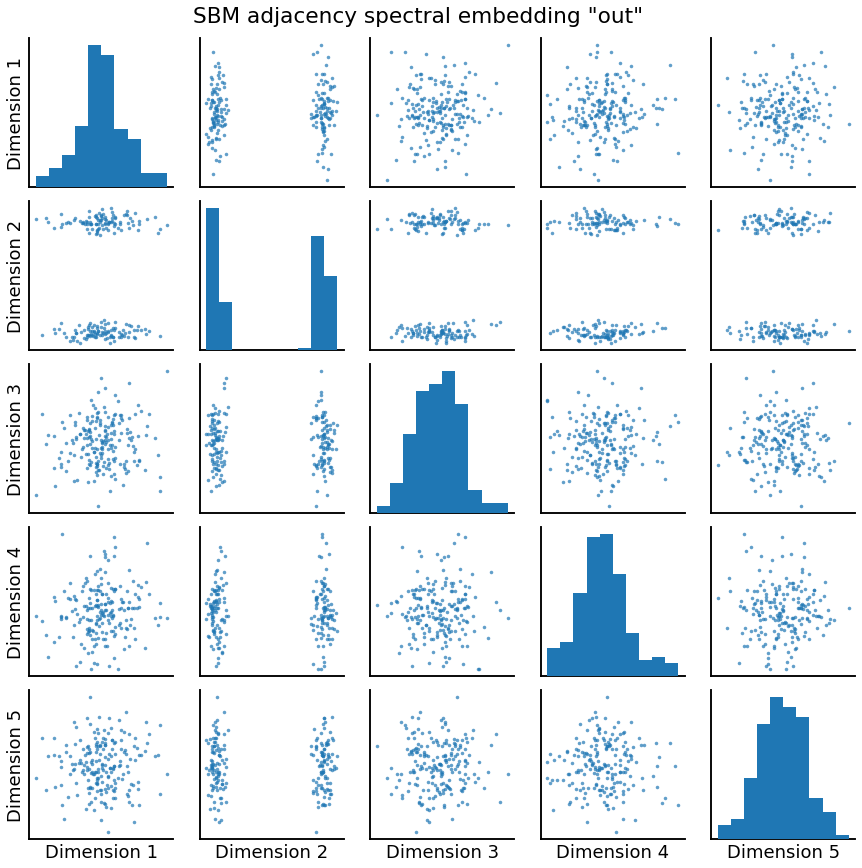

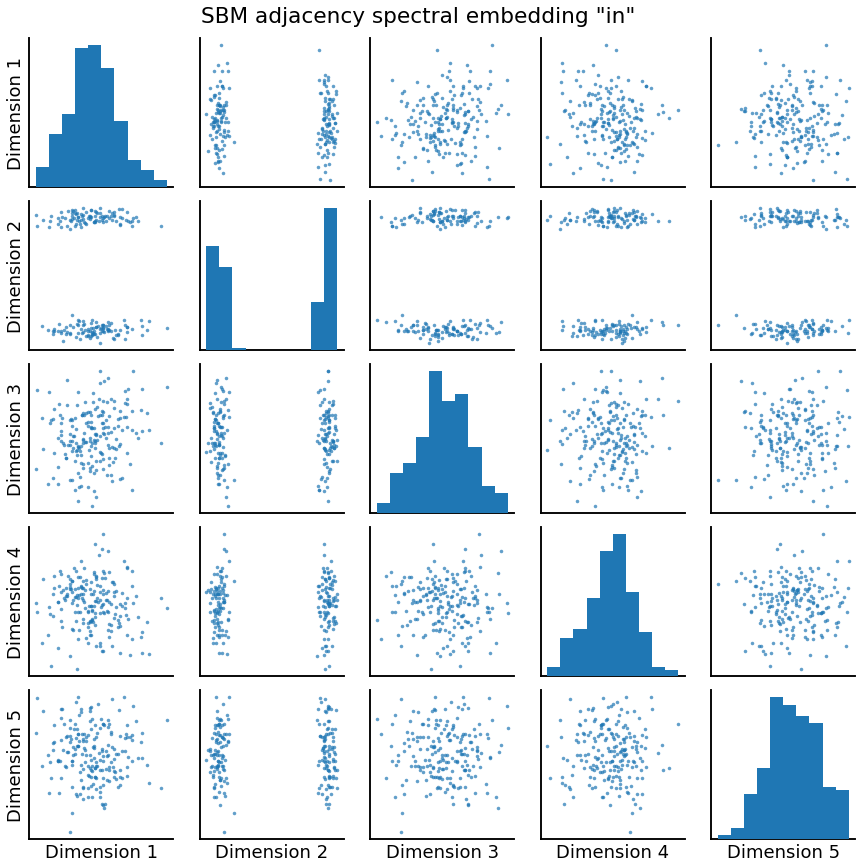

In [4]:
ase = AdjacencySpectralEmbed()
Xhat, Yhat = ase.fit_transform(directed_sbm)
pairplot(Xhat, title='SBM adjacency spectral embedding "out"')
pairplot(Yhat, title='SBM adjacency spectral embedding "in"')

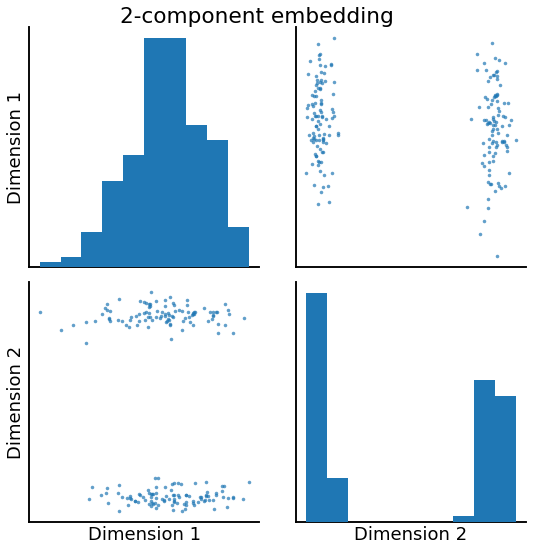

In [5]:
ase = AdjacencySpectralEmbed(n_components=2, algorithm='truncated')
Xhat = ase.fit_transform(undirected_sbm)
pairplot(Xhat, title='2-component embedding', height=4)

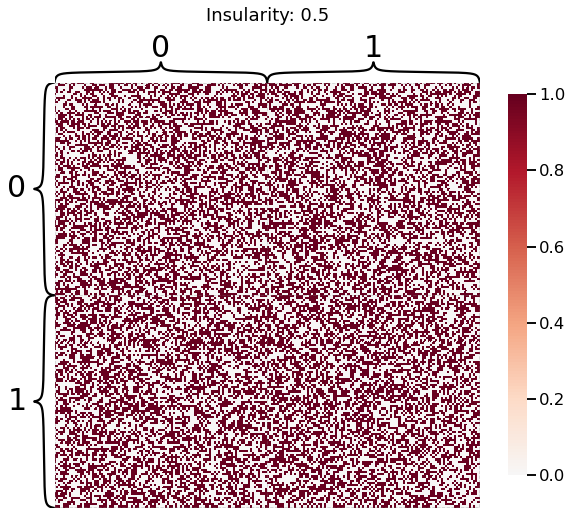

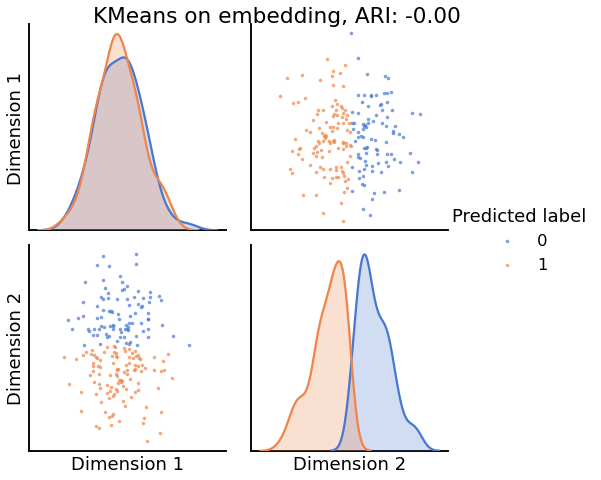

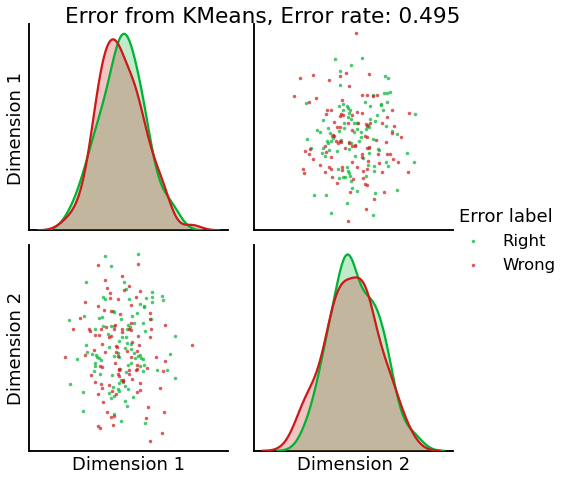

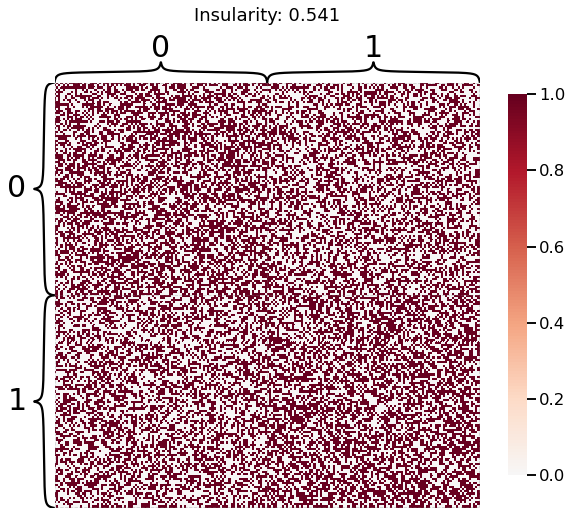

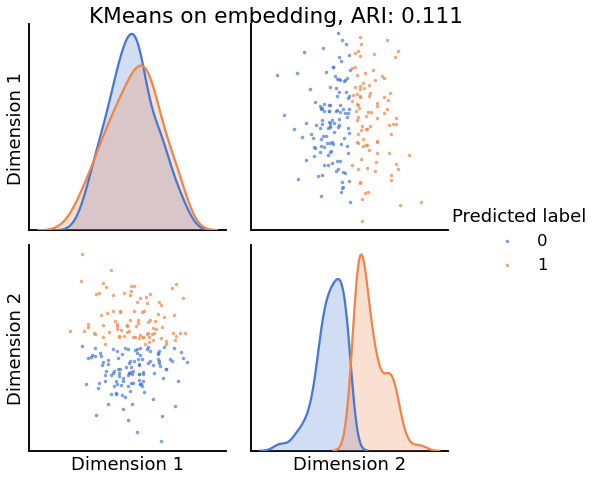

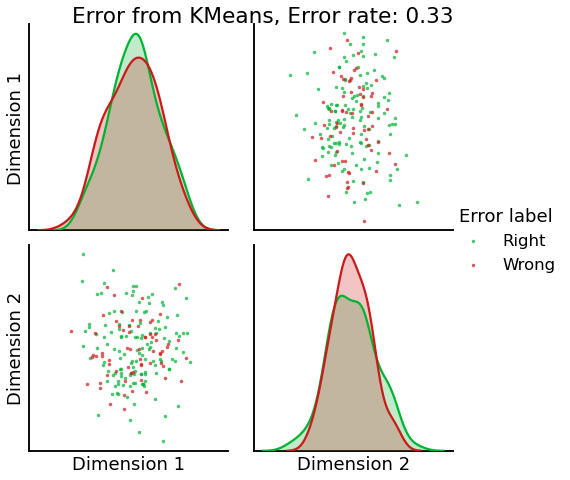

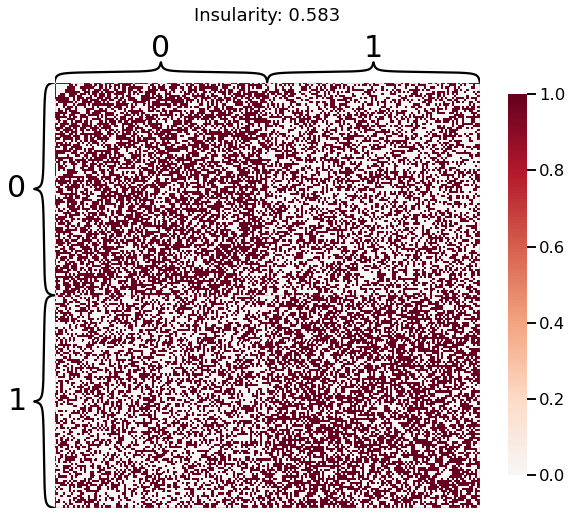

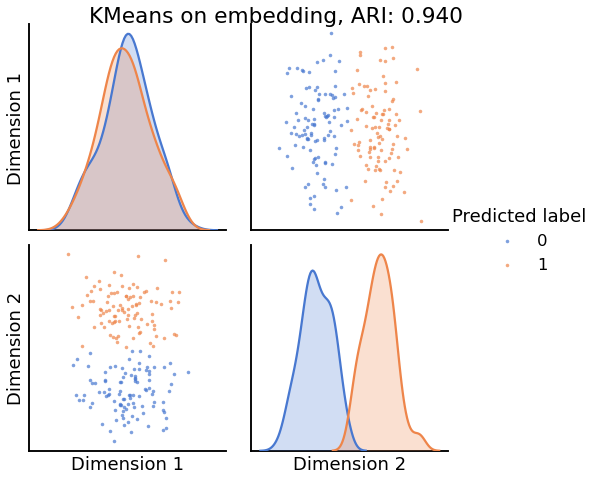

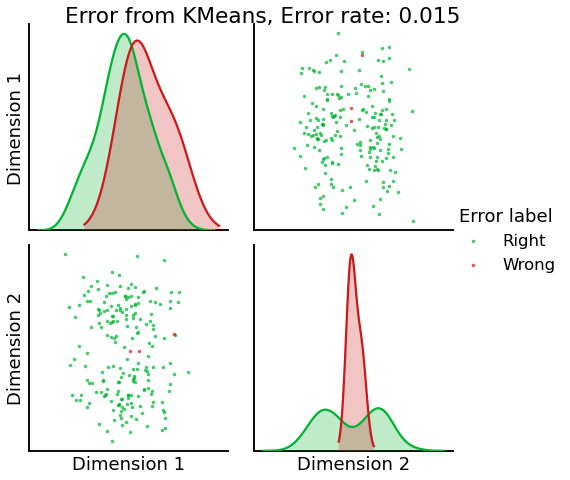

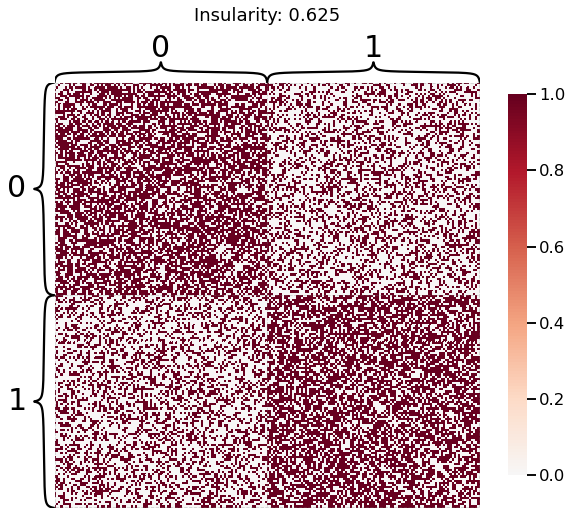

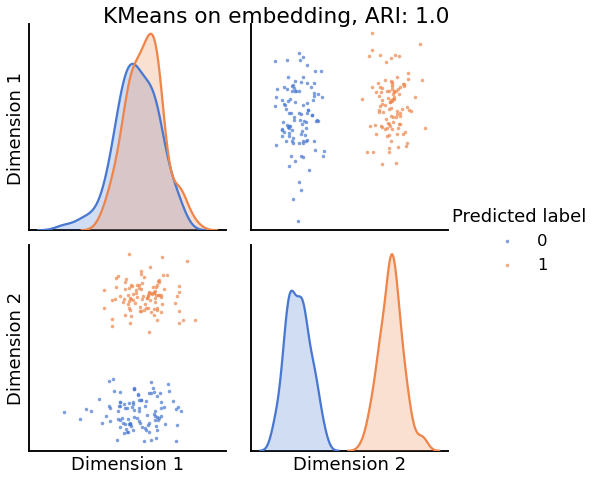

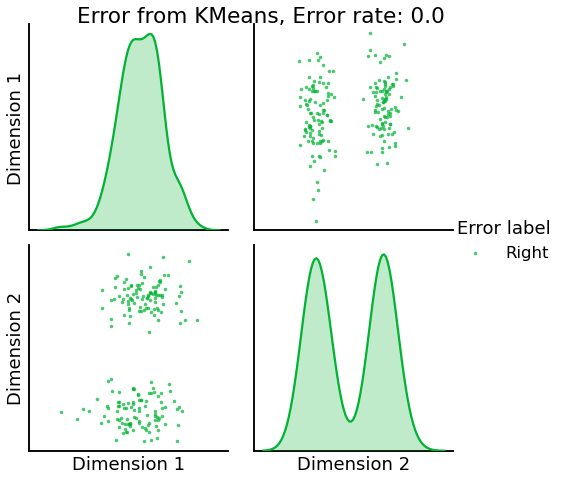

In [6]:
palette = {'Right':(0,0.7,0.2),
           'Wrong':(0.8,0.1,0.1)}
for insularity in np.linspace(0.5, 0.625, 4):
    P = np.array([[insularity, 1-insularity], [1-insularity, insularity]])
    sampled_sbm = sbm(2 * [n_verts], P)
    heatmap(sampled_sbm, title='Insularity: {}'.format(str(insularity)[:5]), inner_hier_labels=labels_sbm)
    Xhat = AdjacencySpectralEmbed(n_components=2).fit_transform(sampled_sbm)
    labels_kmeans = KMeans(n_clusters=2).fit_predict(Xhat)
    ari = adjusted_rand_score(labels_sbm, labels_kmeans)
    error = labels_sbm - labels_kmeans
    error = error != 0
    # sometimes the labels given by kmeans will be the inverse of ours
    if np.sum(error) / (2 * n_verts) > 0.5:
        error = error == 0
    error_rate = np.sum(error) / (2 * n_verts)
    error_label = (2 * n_verts) * ['Right']
    error_label = np.array(error_label)
    error_label[error] = 'Wrong'

    pairplot(Xhat,
             labels=labels_kmeans,
             title='KMeans on embedding, ARI: {}'.format(str(ari)[:5]),
             legend_name='Predicted label',
             height=3.5,
             palette='muted')
    pairplot(Xhat,
             labels=error_label,
             title='Error from KMeans, Error rate: {}'.format(str(error_rate)),
             legend_name='Error label',
             height=3.5,
             palette=palette)

In [7]:
import graspy

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
from graspy.simulations import sbm

n = [25, 25]
P1 = [[.3, .1],
      [.1, .7]]
P2 = [[.3, .1],
      [.1, .3]]

np.random.seed(8)
G1 = sbm(n, P1)
G2 = sbm(n, P2)

<AxesSubplot:title={'center':'Visualization of Graph 2'}>

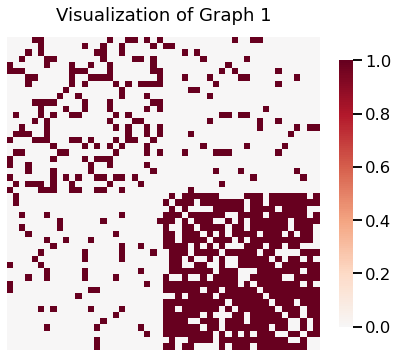

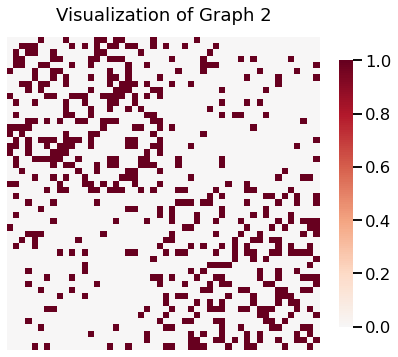

In [9]:
from graspy.plot import heatmap

heatmap(G1, figsize=(7, 7), title='Visualization of Graph 1')
heatmap(G2, figsize=(7, 7), title='Visualization of Graph 2')

In [10]:
from graspy.embed import OmnibusEmbed

embedder = OmnibusEmbed()
Zhat = embedder.fit_transform([G1, G2])

print(Zhat.shape)

(2, 50, 2)


Text(0.5, 1.0, 'Latent Positions from Omnibus Embedding')

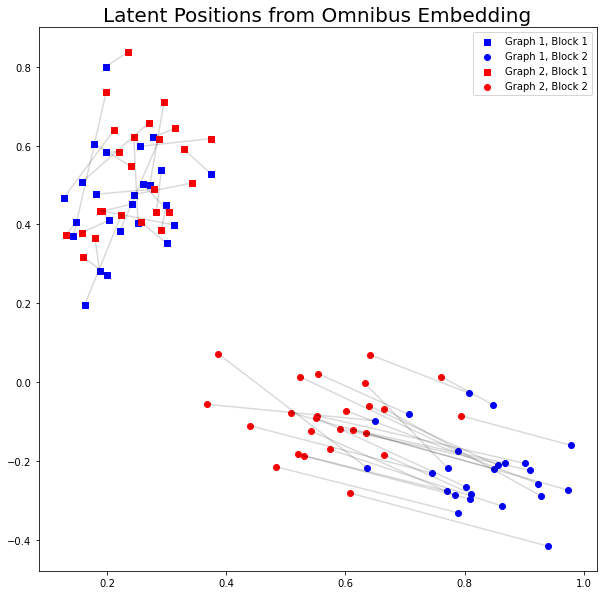

In [11]:
Xhat1 = Zhat[0]
Xhat2 = Zhat[1]

# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(Xhat1[:25, 0], Xhat1[:25, 1], marker='s', c='blue', label = 'Graph 1, Block 1')
ax.scatter(Xhat1[25:, 0], Xhat1[25:, 1], marker='o', c='blue', label = 'Graph 1, Block 2')
ax.scatter(Xhat2[:25, 0], Xhat2[:25, 1], marker='s', c='red', label = 'Graph 2, Block 1')
ax.scatter(Xhat2[25:, 0], Xhat2[25:, 1], marker='o', c='red', label= 'Graph 2, Block 2')
ax.legend()

# Plot lines between matched pairs of points
for i in range(50):
    ax.plot([Xhat1[i, 0], Xhat2[i, 0]], [Xhat1[i, 1], Xhat2[i, 1]], 'black', alpha = 0.15)

ax.set_title('Latent Positions from Omnibus Embedding', fontsize=20)